# **Multi-layer Perceptron**


In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])




Epoch 1/100


7/7 [==============================] - 3s 6ms/step - loss: 7.1568 - mae: 2.2961
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 4.9101 - mae: 1.7936
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 3.3176 - mae: 1.3886
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 2.2485 - mae: 1.1516
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 1.6509 - mae: 1.0178
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 1.4283 - mae: 0.9576
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 1.2733 - mae: 0.8999
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 1.1797 - mae: 0.8608
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 1.1307 - mae: 0.8384
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 1.1017 - mae: 0.8220
Epoch 11/100
7/7 [==============================] - 0s 4ms/step - loss: 1.

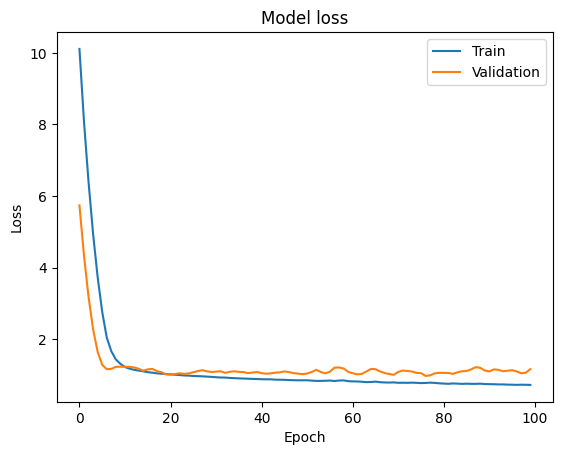

In [2]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# **Assignment:** what is a Validation Set? or validation loss?

---

# Early Stopping of Epochs

Epoch 1/100
7/7 [==============================] - 2s 108ms/step - loss: 12.0781 - val_loss: 7.7086
Epoch 2/100
7/7 [==============================] - 0s 22ms/step - loss: 10.2666 - val_loss: 6.3488
Epoch 3/100
7/7 [==============================] - 0s 20ms/step - loss: 8.6452 - val_loss: 5.1215
Epoch 4/100
7/7 [==============================] - 0s 18ms/step - loss: 7.1808 - val_loss: 3.9662
Epoch 5/100
7/7 [==============================] - 0s 23ms/step - loss: 5.7081 - val_loss: 2.8668
Epoch 6/100
7/7 [==============================] - 0s 18ms/step - loss: 4.3204 - val_loss: 1.9210
Epoch 7/100
7/7 [==============================] - 0s 19ms/step - loss: 3.1128 - val_loss: 1.2696
Epoch 8/100
7/7 [==============================] - 0s 48ms/step - loss: 2.2655 - val_loss: 0.8916
Epoch 9/100
7/7 [==============================] - 0s 24ms/step - loss: 1.7469 - val_loss: 0.8185
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 1.4836 - val_loss: 0.8857
Epoch 11/100
7/7

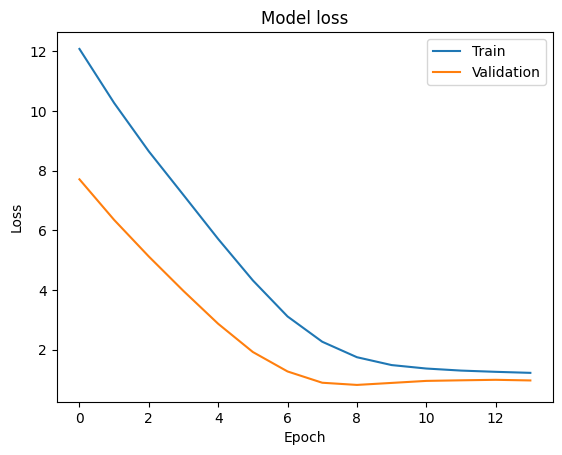

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()